# Meat Price Analysis

In recent months (from late 2018 to May 2019) there has been a shift in meat prices upwards. More recently there has been concern about a meat shortage. This analysis hopes to do the following:

- Explain the cause of meat price fluctuations
- Create a general model for forecasting meat prices
- Determine whether the strategic meat reserve has an impact on meat prices

### Introduction
Before we begin a short introduction is useful. In Mongolia meat prices are highly seasonal with meat prices rising in the Spring and then falling in the Fall. The meat supply itself comes from nomadic herder who make up roughly 30% of the population. These herders do not operate with anything resembling a western mode of production. Their behavior has more to do with herd health and preparations for the various challenges of each season. 

Here is a rough generalization of the behavior of herders. This of course does not speak for all herders but from what I have observed this is relatively typical behavior. In the Fall before winter sets in herders will slaughter or sell those animals which are likely to die in the coming winter. Then in the Spring during breeding season herders often restrict the amount they sell so as not to limit their potential growth that year. In the summer the productive animals are known and herders are more willing to sell or slaughter those animals that are not pregnant. With this cycle it is clear that seasonal prices are primarily being driven by supply of meat. 

The government purchases extra meat when prices are generally low and freeze it for use in times when supply is lower. This program has being going on for several years. Based on available data it is unclear if this program works or not...(trying to obtain more data)

In the past two years (2017 and 2018) meat exports have risen sharply. Many blame these exports for rising meat prices. However, in any economic system prices rely on an interplay between the market forces, including supply and demand. It is the aim of this analysis to make these forces more clear.

## To Do
- plot exports and prices
- Write article.

In [174]:
import pandas as pd
import numpy as np
import plotly_express as px

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('G:\My Drive\Data Science\mds.mplstyle')

### Import and merge data

In [175]:
# We have several datasets we need to import and merge. We are using the intermediate folder as some data cleaning was done in Excel. 
import os
os.listdir('Data/intermediate')

['average wages and salary in ulaanbaatar.xlsx',
 'meat prices.xlsx',
 'total livestock.xlsx',
 'livestock loss.xlsx',
 'meat export.xlsx',
 'animal product exports.xlsx',
 'meat prices.csv',
 'meat export.csv',
 'total livestock.csv',
 'cpi.csv',
 'livestock loss.csv',
 'average wages and salary in ulaanbaatar.csv',
 'animal product exports.csv',
 '.ipynb_checkpoints',
 'meat_adj.csv']

Here is a description of our data:

- Average wages and salary in Ulaanbaatar - as reported by 1212.mn
- Meat prices - average monthly meat prices for Ulaanbaatar as reported by 1212.mn
- Total livestock - total livestock (in thousands) - 1212.mn
- Meat export - the total amount of meat product exports (in tons) - 1212.mn
- CPI - the monthly change in inflation in percent terms - MongolBank
- Livestock loss - the number of animals reported to have died during that year - 1212.mn
- Meat Adj - adjusted prices for beef and mutton using the monthly inflation change

In [176]:
prices = pd.read_csv('Data/intermediate/meat prices.csv')
meat_export = pd.read_csv('Data/intermediate/meat export.csv')
cpi = pd.read_csv('Data/intermediate/cpi.csv')
livestock_loss = pd.read_csv('Data/intermediate/livestock loss.csv')
avg_wage = pd.read_csv('Data/intermediate/average wages and salary in ulaanbaatar.csv')
total_livestock = pd.read_csv('Data/intermediate/total livestock.csv', parse_dates=True)
animal_export = pd.read_csv('Data/intermediate/animal product exports.csv')
meat_adj = pd.read_csv('Data/intermediate/meat_adj.csv')

In [177]:
animal_export.head()

,year,animal_product_export
0,1995,10414.3
1,1996,14136.8
2,1997,18664.2
3,1998,18793.2
4,1999,21864.5


In [178]:
total_livestock['year'] = pd.to_datetime(total_livestock['year'], format='%Y')
animal_export['year'] = pd.to_datetime(animal_export['year'], format='%Y')
avg_wage['Quarter'] = pd.to_datetime(avg_wage['Quarter'])
cpi['month'] = pd.to_datetime(cpi['Month'])
meat_adj['Day'] = pd.to_datetime(meat_adj['Day'])

In [179]:
df = pd.merge(prices,meat_export,how='left',left_on='month', right_on='year')

In [180]:
df = pd.merge(df,livestock_loss,how='left',left_on='month', right_on='year')

In [181]:
df['month'] = pd.to_datetime(df['month'])

In [182]:
df = pd.merge(df,cpi,how='left',left_on='month',right_on='month')

In [183]:
df = pd.merge(df,avg_wage,how='left',left_on='month', right_on='Quarter')

In [184]:
df = pd.merge(df,total_livestock, how='left',left_on='month',right_on='year')

In [185]:
df = pd.merge(df,animal_export, how='left',left_on='month',right_on='year')

In [186]:
df.head()

,month,"Beef, without bones, kg","Mutton, with bones, kg","Goat meat, with bones, kg","Chicken, thigh, kg, imported","Horse meat, with bones, kg",year_x,Frozen beef (t),Horse meat (t),Edible meet offal (t),year_y,animal_loss,Month,Monthly CPI,Quarter,avg_salary,year_x,livestock,year_y,animal_product_export
0,2010-12-01,4640,3710,2590.0,4420.0,2710.0,NaN,NaN,NaN,NaN,NaN,NaN,2010/12,2.4,NaT,NaN,NaT,NaN,NaT,NaN
1,2011-01-01,5380,4205,3165.0,4285.0,3460.0,1/1/2011,NaN,3865.1,414.6,1/1/2011,651.3,2011/01,3.1,2011-01-01,430.3,2011-01-01,36335.78,2011-01-01,39946.9
2,2011-02-01,5415,4250,3395.0,4195.0,3605.0,NaN,NaN,NaN,NaN,NaN,NaN,2011/02,0.3,NaT,NaN,NaT,NaN,NaT,NaN
3,2011-03-01,5070,3810,3260.0,4090.0,3535.0,NaN,NaN,NaN,NaN,NaN,NaN,2011/03,-1.3,NaT,NaN,NaT,NaN,NaT,NaN
4,2011-04-01,4845,3610,2805.0,3910.0,3290.0,NaN,NaN,NaN,NaN,NaN,NaN,2011/04,-0.5,2011-04-01,462.1,NaT,NaN,NaT,NaN


In [187]:
df = pd.merge(df,meat_adj, how='left',left_on='month',right_on='Day')

In [188]:
df.head()

,month,"Beef, without bones, kg","Mutton, with bones, kg","Goat meat, with bones, kg","Chicken, thigh, kg, imported","Horse meat, with bones, kg",year_x,Frozen beef (t),Horse meat (t),Edible meet offal (t),...,Monthly CPI,Quarter,avg_salary,year_x,livestock,year_y,animal_product_export,Day,Beef without bones adj,Mutton adj
0,2010-12-01,4640,3710,2590.0,4420.0,2710.0,NaN,NaN,NaN,NaN,...,2.4,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN
1,2011-01-01,5380,4205,3165.0,4285.0,3460.0,1/1/2011,NaN,3865.1,414.6,...,3.1,2011-01-01,430.3,2011-01-01,36335.78,2011-01-01,39946.9,2011-01-01,5380.0,4205.0
2,2011-02-01,5415,4250,3395.0,4195.0,3605.0,NaN,NaN,NaN,NaN,...,0.3,NaT,NaN,NaT,NaN,NaT,NaN,2011-02-01,5396.0,4218.0
3,2011-03-01,5070,3810,3260.0,4090.0,3535.0,NaN,NaN,NaN,NaN,...,-1.3,NaT,NaN,NaT,NaN,NaT,NaN,2011-03-01,5326.0,4163.0
4,2011-04-01,4845,3610,2805.0,3910.0,3290.0,NaN,NaN,NaN,NaN,...,-0.5,2011-04-01,462.1,NaT,NaN,NaT,NaN,2011-04-01,5299.0,4142.0


In [189]:
df = df.drop(columns=['year_x','year_y','Month','year_x','year_y','Quarter','Day'])
df = df.rename(columns = {'month':'date'})

In [190]:
df.head()

,date,"Beef, without bones, kg","Mutton, with bones, kg","Goat meat, with bones, kg","Chicken, thigh, kg, imported","Horse meat, with bones, kg",Frozen beef (t),Horse meat (t),Edible meet offal (t),animal_loss,Monthly CPI,avg_salary,livestock,animal_product_export,Beef without bones adj,Mutton adj
0,2010-12-01,4640,3710,2590.0,4420.0,2710.0,NaN,NaN,NaN,NaN,2.4,NaN,NaN,NaN,NaN,NaN
1,2011-01-01,5380,4205,3165.0,4285.0,3460.0,NaN,3865.1,414.6,651.3,3.1,430.3,36335.78,39946.9,5380.0,4205.0
2,2011-02-01,5415,4250,3395.0,4195.0,3605.0,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,5396.0,4218.0
3,2011-03-01,5070,3810,3260.0,4090.0,3535.0,NaN,NaN,NaN,NaN,-1.3,NaN,NaN,NaN,5326.0,4163.0
4,2011-04-01,4845,3610,2805.0,3910.0,3290.0,NaN,NaN,NaN,NaN,-0.5,462.1,NaN,NaN,5299.0,4142.0


### Visualize Data

Let's visualize the data to better understand the trends.

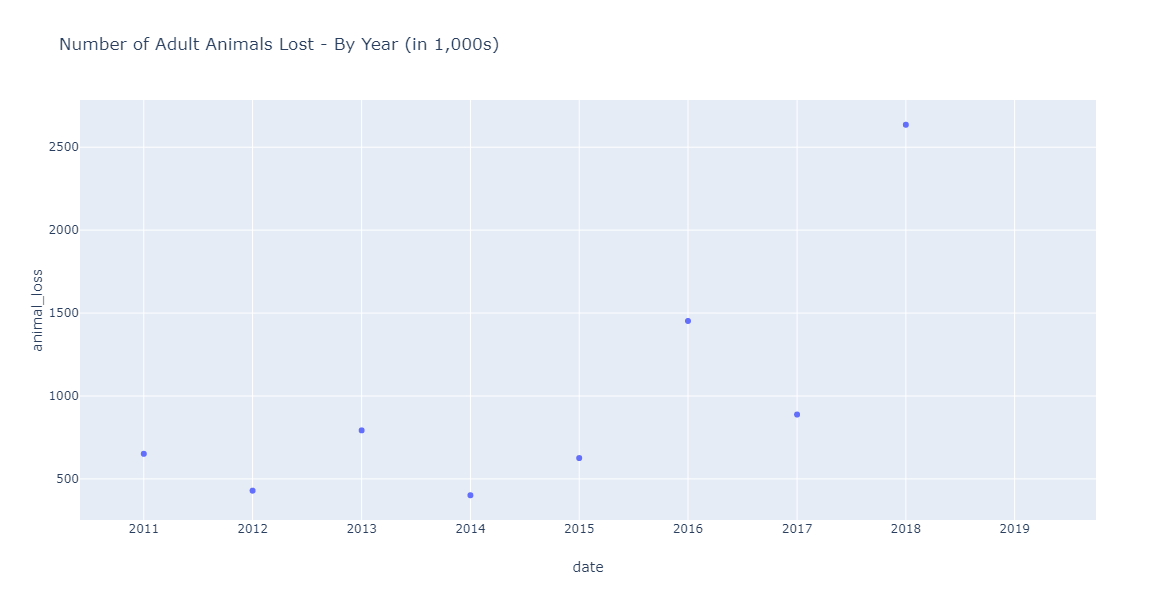

In [191]:
px.scatter(df, x='date', y='animal_loss', title='Number of Adult Animals Lost - By Year (in 1,000s)')

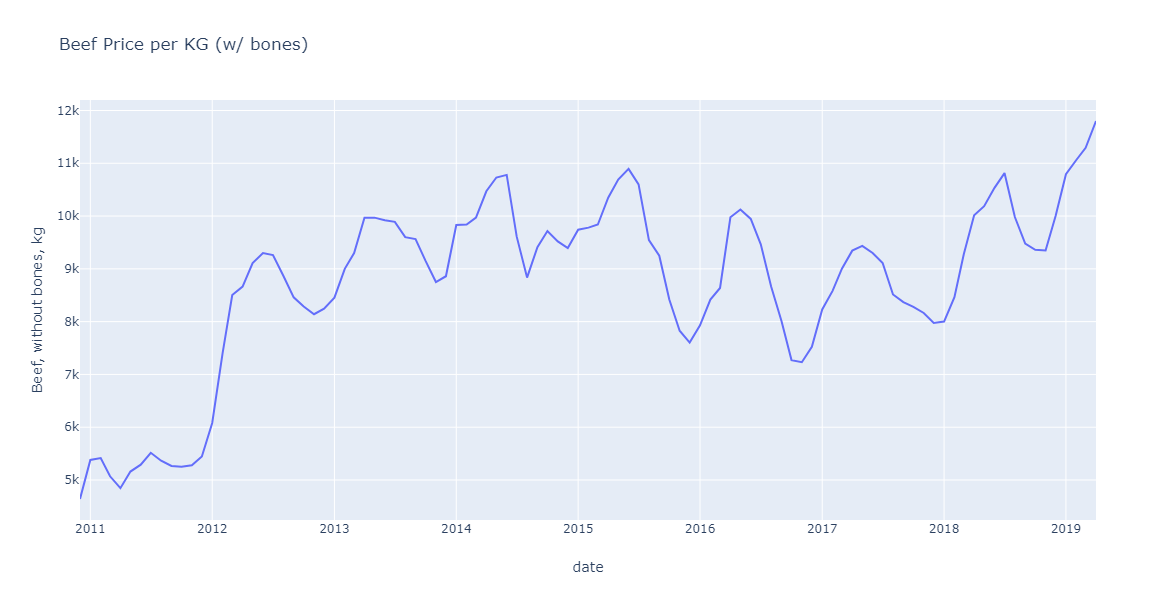

In [194]:
px.line(df, x='date', y='Beef, without bones, kg', title='Beef Price per KG (w/ bones)')

By looking at these two charts we can see that a higher livestock loss leads to a higher standard deviation for meat prices. 

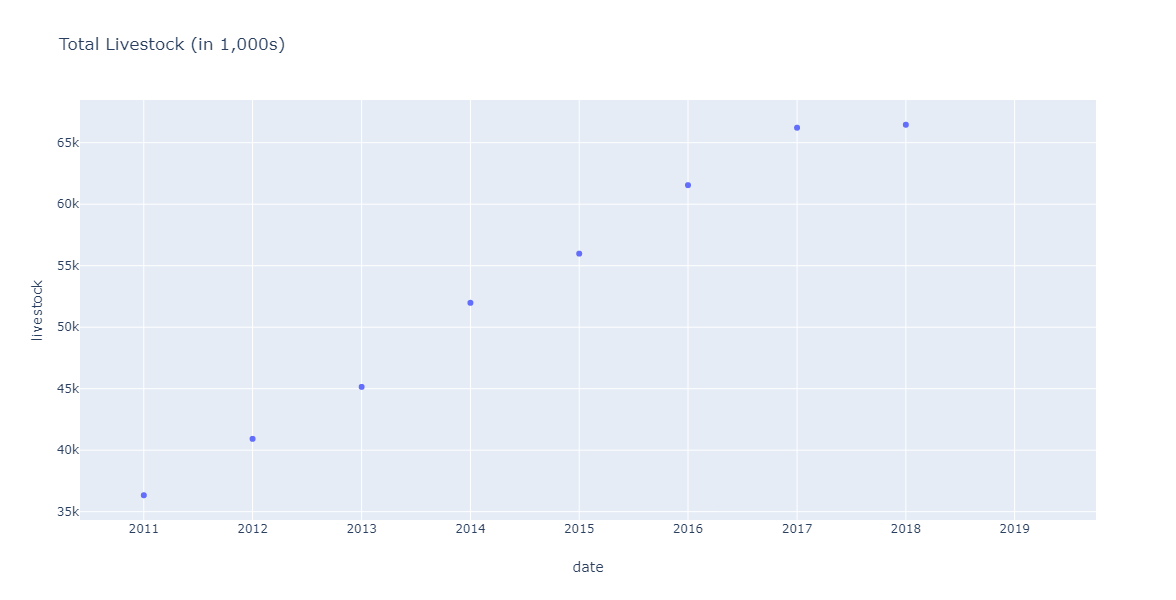

In [195]:
px.scatter(df, x='date', y='livestock', title='Total Livestock (in 1,000s)')

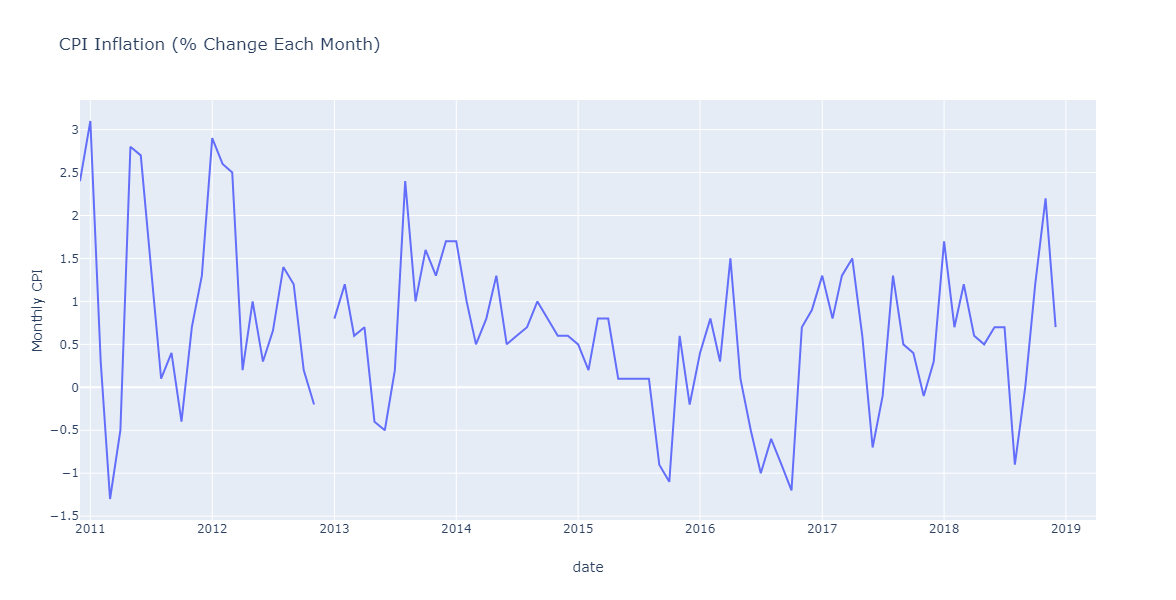

In [196]:
px.line(df, x='date', y='Monthly CPI', title='CPI Inflation (% Change Each Month)')

It also appears that inflation has steadily gone up while meat prices have not followed this trend at all.

#### Meat prices vs CPI

In [197]:
df.head()

,date,"Beef, without bones, kg","Mutton, with bones, kg","Goat meat, with bones, kg","Chicken, thigh, kg, imported","Horse meat, with bones, kg",Frozen beef (t),Horse meat (t),Edible meet offal (t),animal_loss,Monthly CPI,avg_salary,livestock,animal_product_export,Beef without bones adj,Mutton adj
0,2010-12-01,4640,3710,2590.0,4420.0,2710.0,NaN,NaN,NaN,NaN,2.4,NaN,NaN,NaN,NaN,NaN
1,2011-01-01,5380,4205,3165.0,4285.0,3460.0,NaN,3865.1,414.6,651.3,3.1,430.3,36335.78,39946.9,5380.0,4205.0
2,2011-02-01,5415,4250,3395.0,4195.0,3605.0,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,5396.0,4218.0
3,2011-03-01,5070,3810,3260.0,4090.0,3535.0,NaN,NaN,NaN,NaN,-1.3,NaN,NaN,NaN,5326.0,4163.0
4,2011-04-01,4845,3610,2805.0,3910.0,3290.0,NaN,NaN,NaN,NaN,-0.5,462.1,NaN,NaN,5299.0,4142.0


We can visualize the actual price of beef compared to what it would be if beef tracked with CPI. To do this we use our first price as the starting point. From there we adjust the meat price based on the the monthly inflation percentage using the formula below.

Prev price * (1 + Monthly Inflation %) = Adjusted price

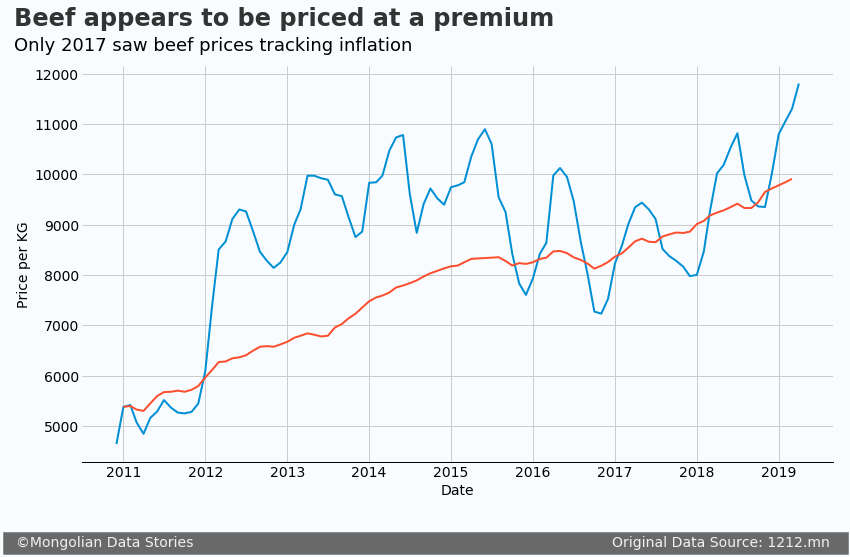

In [341]:
fig, ax = plt.subplots()
ax.plot(df['date'], df['Beef, without bones, kg'] , linewidth=2)
ax.plot(df['date'], df['Beef without bones adj'],linewidth=2)
ax.set_xlabel('Date')
ax.set_ylabel('Price per KG')

ax.text(x = 733650, y = 12950, s = 'Beef appears to be priced at a premium', fontsize=24, weight='bold', alpha=.8)
ax.text(x = 733650, y = 12450, s= 'Only 2017 saw beef prices tracking inflation', fontsize=18)
ax.text(x = 733620, y = 2600, s = '  ©Mongolian Data Stories                                                                                             Original Data Source: 1212.mn   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('Images/beef-inflation.png', dpi = 300, bbox_inches="tight")

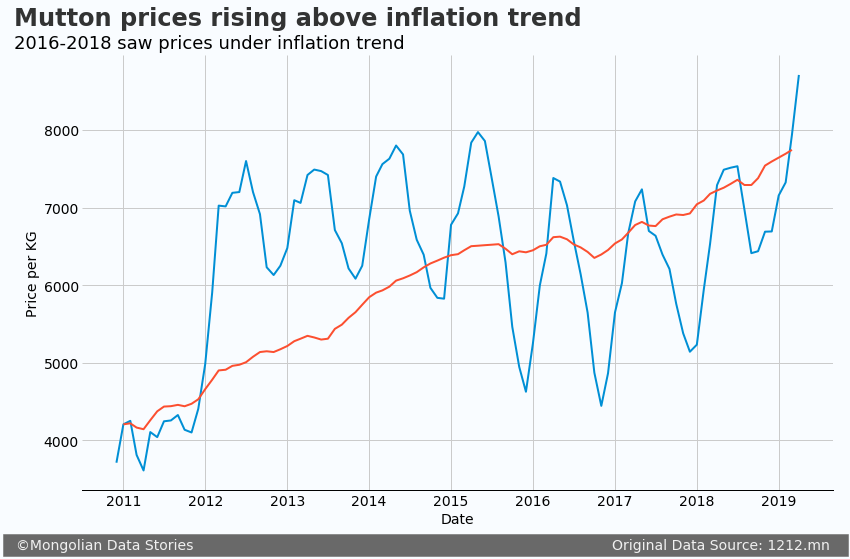

In [342]:
fig, ax = plt.subplots()
ax.plot(df['date'], df['Mutton, with bones, kg'] , linewidth=2)
ax.plot(df['date'], df['Mutton adj'],linewidth=2)
ax.set_xlabel('Date')
ax.set_ylabel('Price per KG')

ax.text(x = 733650, y = 9350, s = 'Mutton prices rising above inflation trend', fontsize=24, weight='bold', alpha=.8)
ax.text(x = 733650, y = 9050, s= '2016-2018 saw prices under inflation trend', fontsize=18)
ax.text(x = 733620, y = 2600, s = '  ©Mongolian Data Stories                                                                                             Original Data Source: 1212.mn   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('Images/mutton-inflation.png', dpi = 300, bbox_inches="tight")

For both beef and mutton prices from 2012-2015 were above the adjusted line. Mutton trended below the adjusted line from 2016-2019. Beef however appears to track the adjusted line for 2016 and 2017. For 2018 and now 2019 beef prices are above the line. 

#### Animal loss and prices

In [200]:
df.head()

,date,"Beef, without bones, kg","Mutton, with bones, kg","Goat meat, with bones, kg","Chicken, thigh, kg, imported","Horse meat, with bones, kg",Frozen beef (t),Horse meat (t),Edible meet offal (t),animal_loss,Monthly CPI,avg_salary,livestock,animal_product_export,Beef without bones adj,Mutton adj
0,2010-12-01,4640,3710,2590.0,4420.0,2710.0,NaN,NaN,NaN,NaN,2.4,NaN,NaN,NaN,NaN,NaN
1,2011-01-01,5380,4205,3165.0,4285.0,3460.0,NaN,3865.1,414.6,651.3,3.1,430.3,36335.78,39946.9,5380.0,4205.0
2,2011-02-01,5415,4250,3395.0,4195.0,3605.0,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,5396.0,4218.0
3,2011-03-01,5070,3810,3260.0,4090.0,3535.0,NaN,NaN,NaN,NaN,-1.3,NaN,NaN,NaN,5326.0,4163.0
4,2011-04-01,4845,3610,2805.0,3910.0,3290.0,NaN,NaN,NaN,NaN,-0.5,462.1,NaN,NaN,5299.0,4142.0


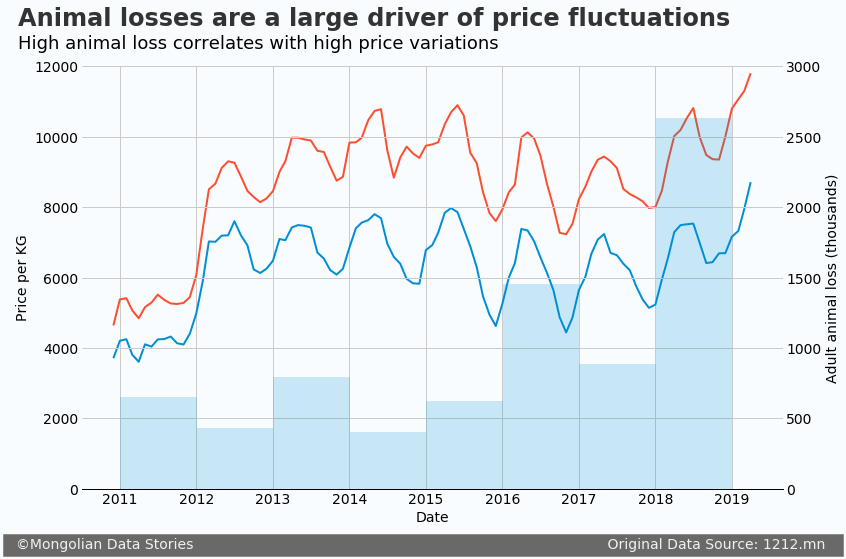

In [320]:
from datetime import timedelta 

fig, ax = plt.subplots()
ax.plot(df['date'], df['Mutton, with bones, kg'] , linewidth=2)
ax.plot(df['date'], df['Beef, without bones, kg'] , linewidth=2)
ax2 = ax.twinx()
ax2.bar(df['date']  + timedelta(days=185), df['animal_loss'],width=365,alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price per KG')
ax2.set_ylabel('Adult animal loss (thousands)')
ax.set_ylim(0,12000)
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks())))

ax.text(x = 733650, y = 13150, s = 'Animal losses are a large driver of price fluctuations', fontsize=24, weight='bold', alpha=.8)
ax.text(x = 733650, y = 12500, s= 'High animal loss correlates with high price variations', fontsize=18)
ax.text(x = 733600, y = -1700, s = '  ©Mongolian Data Stories                                                                                            Original Data Source: 1212.mn   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('Images/losses.png', dpi = 300, bbox_inches="tight")

#### Exports and meat prices

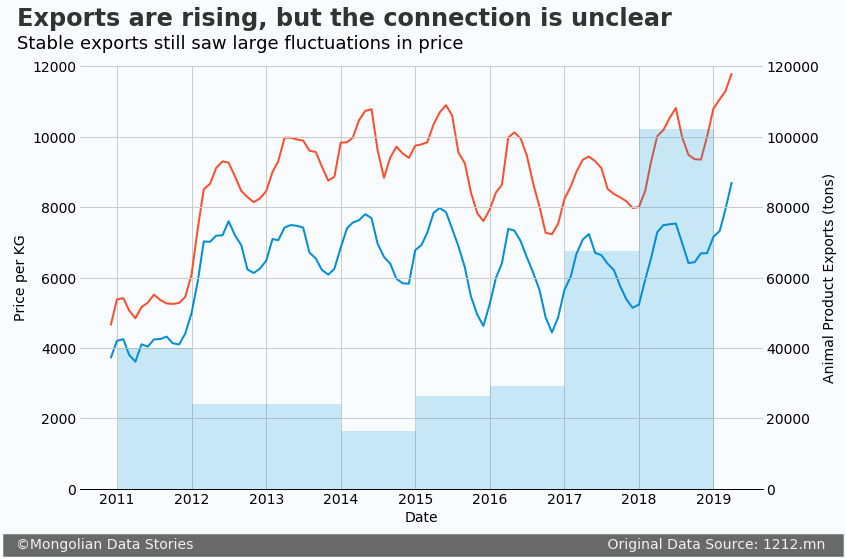

In [319]:
from datetime import timedelta

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(df['date'], df['Mutton, with bones, kg'] , linewidth=2)
ax.plot(df['date'], df['Beef, without bones, kg'] , linewidth=2)
ax2.bar(df['date']  + timedelta(days=185), df['animal_product_export'],width=365,alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price per KG')
ax2.set_ylabel('Animal Product Exports (tons)')
ax.set_ylim(0,12000)
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks())))

ax.text(x = 733650, y = 13150, s = 'Exports are rising, but the connection is unclear', fontsize=24, weight='bold', alpha=.8)
ax.text(x = 733650, y = 12500, s= 'Stable exports still saw large fluctuations in price', fontsize=18)
ax.text(x = 733600, y = -1700, s = '  ©Mongolian Data Stories                                                                                            Original Data Source: 1212.mn   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('Images/exports.png', dpi = 300, bbox_inches="tight")

In [203]:
ax2.get_yticks()[-1]

120000.0

### Forecast with Prophet

While a machine learning model may work, the seasonality and relatively small amount of data show that it may be a good idea to use Prophet to make forecasts.

In [204]:
from fbprophet import Prophet

In [205]:
df.head()

,date,"Beef, without bones, kg","Mutton, with bones, kg","Goat meat, with bones, kg","Chicken, thigh, kg, imported","Horse meat, with bones, kg",Frozen beef (t),Horse meat (t),Edible meet offal (t),animal_loss,Monthly CPI,avg_salary,livestock,animal_product_export,Beef without bones adj,Mutton adj
0,2010-12-01,4640,3710,2590.0,4420.0,2710.0,NaN,NaN,NaN,NaN,2.4,NaN,NaN,NaN,NaN,NaN
1,2011-01-01,5380,4205,3165.0,4285.0,3460.0,NaN,3865.1,414.6,651.3,3.1,430.3,36335.78,39946.9,5380.0,4205.0
2,2011-02-01,5415,4250,3395.0,4195.0,3605.0,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,5396.0,4218.0
3,2011-03-01,5070,3810,3260.0,4090.0,3535.0,NaN,NaN,NaN,NaN,-1.3,NaN,NaN,NaN,5326.0,4163.0
4,2011-04-01,4845,3610,2805.0,3910.0,3290.0,NaN,NaN,NaN,NaN,-0.5,462.1,NaN,NaN,5299.0,4142.0


### Beef Forecast

In [206]:
beef = pd.DataFrame(data=df.date,columns=['ds'])
beef['ds'] = df['date']
beef['y'] = df['Beef, without bones, kg']

In [207]:
beef['animal_loss'] = df['animal_loss'].fillna(method='ffill')

In [208]:
beef['animal_loss'] = beef['animal_loss'].fillna(method='bfill')

In [209]:
beef.head()

,ds,y,animal_loss
0,2010-12-01,4640,651.3
1,2011-01-01,5380,651.3
2,2011-02-01,5415,651.3
3,2011-03-01,5070,651.3
4,2011-04-01,4845,651.3


In [210]:
b = Prophet(n_changepoints=12,changepoint_prior_scale=0.05)
b.add_regressor('animal_loss')
b.fit(beef)

C:\Users\rober\Anaconda3\envs\standard\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\rober\Anaconda3\envs\standard\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [211]:
b_future = b.make_future_dataframe(periods=12, freq='M')
b_future['animal_loss'] = beef['animal_loss']
b_future.head()

,ds,animal_loss
0,2010-12-01,651.3
1,2011-01-01,651.3
2,2011-02-01,651.3
3,2011-03-01,651.3
4,2011-04-01,651.3


In [212]:
np.mean(b_future['animal_loss'], axis=0)

1046.4984158415843

In [213]:
b_future['animal_loss'].fillna(value=np.mean(b_future['animal_loss'], axis=0),inplace=True)

In [214]:
b_forecast = b.predict(b_future)
b_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
108,2019-11-30,10493.280306,9749.906106,11220.018261
109,2019-12-31,11333.772387,10702.458428,12058.257911
110,2020-01-31,12544.682358,11847.064699,13299.925724
111,2020-02-29,12326.768135,11629.713677,13073.184341
112,2020-03-31,12661.331443,11896.790280,13394.177469


In [215]:
b_forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'animal_loss', 'animal_loss_lower', 'animal_loss_upper',
       'extra_regressors_additive', 'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

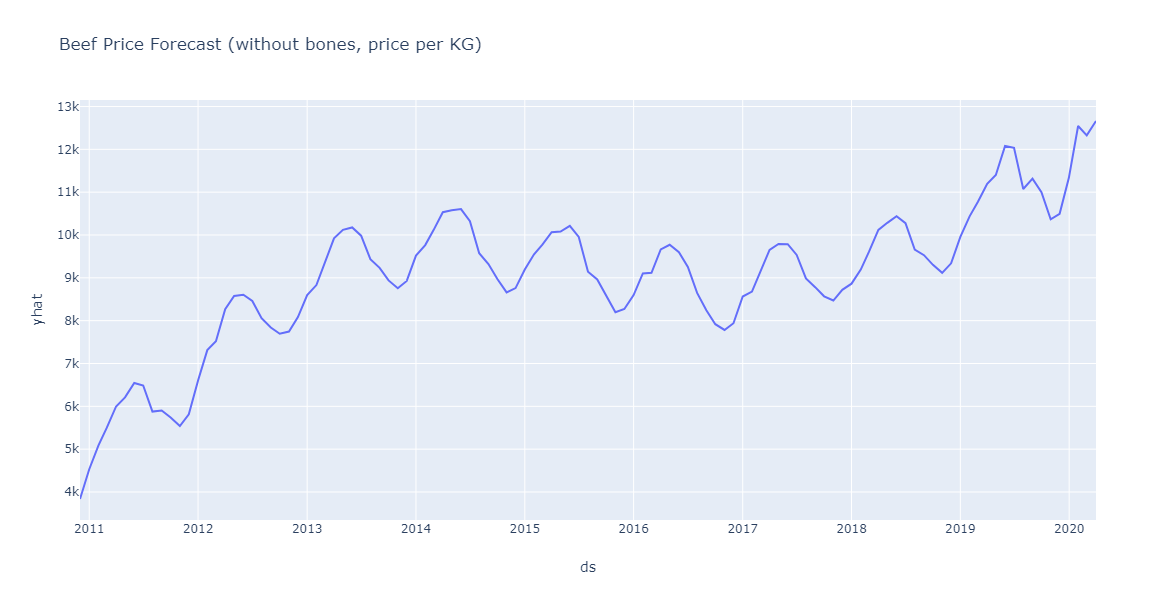

In [216]:
px.line(b_forecast, x='ds', y='yhat', title='Beef Price Forecast (without bones, price per KG)')

C:\Users\rober\Anaconda3\envs\standard\lib\site-packages\matplotlib\figure.py:2369: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



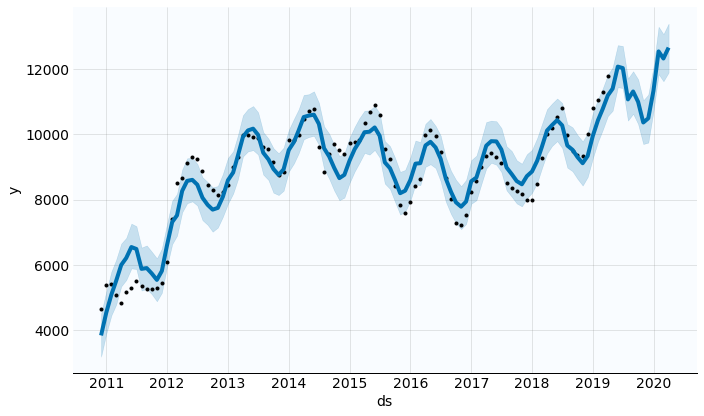

In [217]:
beef_forecast = b.plot(b_forecast)

C:\Users\rober\Anaconda3\envs\standard\lib\site-packages\matplotlib\figure.py:2369: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



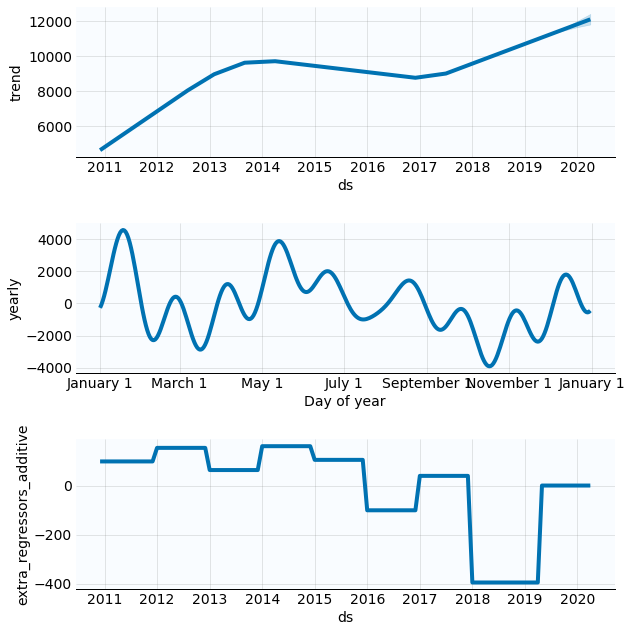

In [218]:
beef_components = b.plot_components(b_forecast)

### Mutton Forecast

In [219]:
df.head()

,date,"Beef, without bones, kg","Mutton, with bones, kg","Goat meat, with bones, kg","Chicken, thigh, kg, imported","Horse meat, with bones, kg",Frozen beef (t),Horse meat (t),Edible meet offal (t),animal_loss,Monthly CPI,avg_salary,livestock,animal_product_export,Beef without bones adj,Mutton adj
0,2010-12-01,4640,3710,2590.0,4420.0,2710.0,NaN,NaN,NaN,NaN,2.4,NaN,NaN,NaN,NaN,NaN
1,2011-01-01,5380,4205,3165.0,4285.0,3460.0,NaN,3865.1,414.6,651.3,3.1,430.3,36335.78,39946.9,5380.0,4205.0
2,2011-02-01,5415,4250,3395.0,4195.0,3605.0,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,5396.0,4218.0
3,2011-03-01,5070,3810,3260.0,4090.0,3535.0,NaN,NaN,NaN,NaN,-1.3,NaN,NaN,NaN,5326.0,4163.0
4,2011-04-01,4845,3610,2805.0,3910.0,3290.0,NaN,NaN,NaN,NaN,-0.5,462.1,NaN,NaN,5299.0,4142.0


In [220]:
mutton = pd.DataFrame(data=df.date,columns=['ds'])
mutton['ds'] = df['date']
mutton['y'] = df['Mutton, with bones, kg']

In [221]:
mutton['animal_loss'] = df['animal_loss'].fillna(method='ffill')

In [222]:
mutton['animal_loss'] = mutton['animal_loss'].fillna(method='bfill')

In [223]:
mutton.head()

,ds,y,animal_loss
0,2010-12-01,3710,651.3
1,2011-01-01,4205,651.3
2,2011-02-01,4250,651.3
3,2011-03-01,3810,651.3
4,2011-04-01,3610,651.3


In [224]:
m = Prophet(n_changepoints=12,changepoint_prior_scale=0.07)
m.add_regressor('animal_loss')
m.fit(mutton)

C:\Users\rober\Anaconda3\envs\standard\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\rober\Anaconda3\envs\standard\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [225]:
m_future = m.make_future_dataframe(periods=12, freq='M')
m_future['animal_loss'] = mutton['animal_loss']
m_future.head()

,ds,animal_loss
0,2010-12-01,651.3
1,2011-01-01,651.3
2,2011-02-01,651.3
3,2011-03-01,651.3
4,2011-04-01,651.3


In [226]:
np.mean(m_future['animal_loss'], axis=0)

1046.4984158415843

In [227]:
m_future['animal_loss'].fillna(value=np.mean(m_future['animal_loss'], axis=0),inplace=True)

In [228]:
m_forecast = m.predict(m_future)
m_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
108,2019-11-30,7408.324633,6834.128729,7947.031768
109,2019-12-31,8436.226398,7877.368293,9022.749414
110,2020-01-31,9198.444206,8584.581278,9708.013405
111,2020-02-29,9162.405331,8566.040222,9745.022588
112,2020-03-31,9612.256896,8994.744544,10181.049094


In [229]:
m_forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'animal_loss', 'animal_loss_lower', 'animal_loss_upper',
       'extra_regressors_additive', 'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

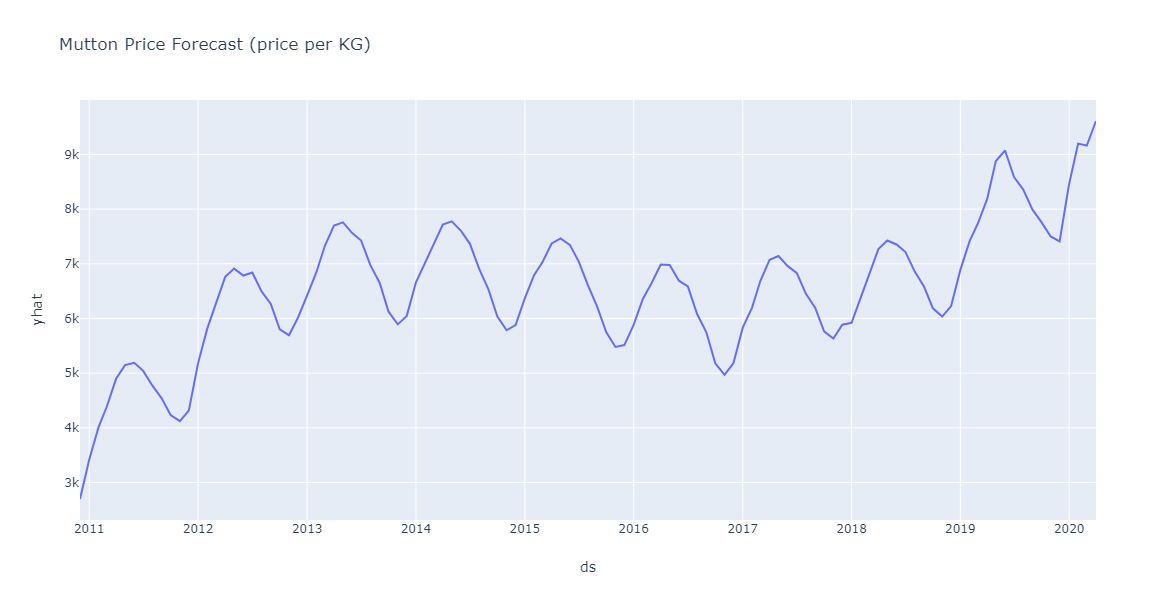

In [230]:
px.line(m_forecast, x='ds', y='yhat', title='Mutton Price Forecast (price per KG)')

C:\Users\rober\Anaconda3\envs\standard\lib\site-packages\matplotlib\figure.py:2369: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



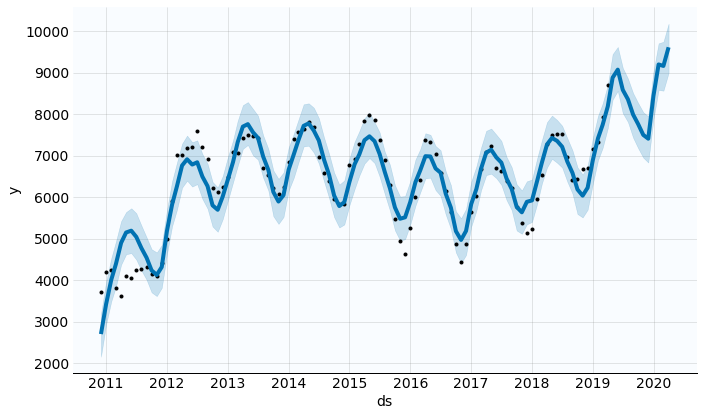

In [231]:
mutton_forecast = m.plot(m_forecast)

C:\Users\rober\Anaconda3\envs\standard\lib\site-packages\matplotlib\figure.py:2369: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



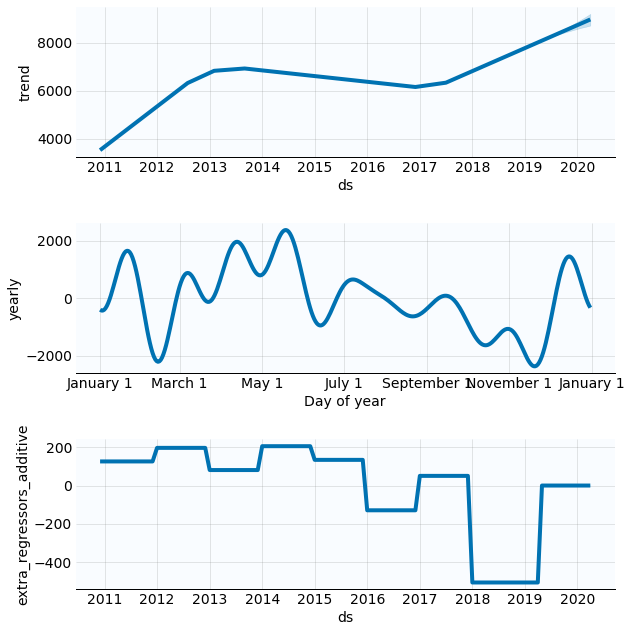

In [232]:
mutton_components = m.plot_components(m_forecast)

#### Forecasts to publish

Our time series analysis is yielding quite good results. Based on our current data we don't have any other significant regressors to deal with. As such

In [239]:
b_forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'animal_loss', 'animal_loss_lower', 'animal_loss_upper',
       'extra_regressors_additive', 'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

- Trend and forecast
- Animal loss
- CPI

In [240]:
b_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,animal_loss,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-01,4612.480359,3185.834431,4495.824536,4612.480359,4612.480359,-775.967377,-775.967377,-775.967377,98.285801,...,98.285801,98.285801,98.285801,-874.253178,-874.253178,-874.253178,0.0,0.0,0.0,3836.512982
1,2011-01-01,4786.742834,3887.224288,5174.548558,4786.742834,4786.742834,-255.415558,-255.415558,-255.415558,98.285801,...,98.285801,98.285801,98.285801,-353.701359,-353.701359,-353.701359,0.0,0.0,0.0,4531.327277
2,2011-02-01,4961.005309,4456.760713,5793.874860,4961.005309,4961.005309,129.076376,129.076376,129.076376,98.285801,...,98.285801,98.285801,98.285801,30.790574,30.790574,30.790574,0.0,0.0,0.0,5090.081685
3,2011-03-01,5118.403673,4775.303300,6147.776336,5118.403673,5118.403673,382.670892,382.670892,382.670892,98.285801,...,98.285801,98.285801,98.285801,284.385091,284.385091,284.385091,0.0,0.0,0.0,5501.074565
4,2011-04-01,5292.666148,5341.164535,6651.089168,5292.666148,5292.666148,704.525825,704.525825,704.525825,98.285801,...,98.285801,98.285801,98.285801,606.240023,606.240023,606.240023,0.0,0.0,0.0,5997.191973


In [241]:
df.head()

,date,"Beef, without bones, kg","Mutton, with bones, kg","Goat meat, with bones, kg","Chicken, thigh, kg, imported","Horse meat, with bones, kg",Frozen beef (t),Horse meat (t),Edible meet offal (t),animal_loss,Monthly CPI,avg_salary,livestock,animal_product_export,Beef without bones adj,Mutton adj
0,2010-12-01,4640,3710,2590.0,4420.0,2710.0,NaN,NaN,NaN,NaN,2.4,NaN,NaN,NaN,NaN,NaN
1,2011-01-01,5380,4205,3165.0,4285.0,3460.0,NaN,3865.1,414.6,651.3,3.1,430.3,36335.78,39946.9,5380.0,4205.0
2,2011-02-01,5415,4250,3395.0,4195.0,3605.0,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,5396.0,4218.0
3,2011-03-01,5070,3810,3260.0,4090.0,3535.0,NaN,NaN,NaN,NaN,-1.3,NaN,NaN,NaN,5326.0,4163.0
4,2011-04-01,4845,3610,2805.0,3910.0,3290.0,NaN,NaN,NaN,NaN,-0.5,462.1,NaN,NaN,5299.0,4142.0


In [242]:
b_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,animal_loss,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-01,4612.480359,3185.834431,4495.824536,4612.480359,4612.480359,-775.967377,-775.967377,-775.967377,98.285801,...,98.285801,98.285801,98.285801,-874.253178,-874.253178,-874.253178,0.0,0.0,0.0,3836.512982
1,2011-01-01,4786.742834,3887.224288,5174.548558,4786.742834,4786.742834,-255.415558,-255.415558,-255.415558,98.285801,...,98.285801,98.285801,98.285801,-353.701359,-353.701359,-353.701359,0.0,0.0,0.0,4531.327277
2,2011-02-01,4961.005309,4456.760713,5793.874860,4961.005309,4961.005309,129.076376,129.076376,129.076376,98.285801,...,98.285801,98.285801,98.285801,30.790574,30.790574,30.790574,0.0,0.0,0.0,5090.081685
3,2011-03-01,5118.403673,4775.303300,6147.776336,5118.403673,5118.403673,382.670892,382.670892,382.670892,98.285801,...,98.285801,98.285801,98.285801,284.385091,284.385091,284.385091,0.0,0.0,0.0,5501.074565
4,2011-04-01,5292.666148,5341.164535,6651.089168,5292.666148,5292.666148,704.525825,704.525825,704.525825,98.285801,...,98.285801,98.285801,98.285801,606.240023,606.240023,606.240023,0.0,0.0,0.0,5997.191973


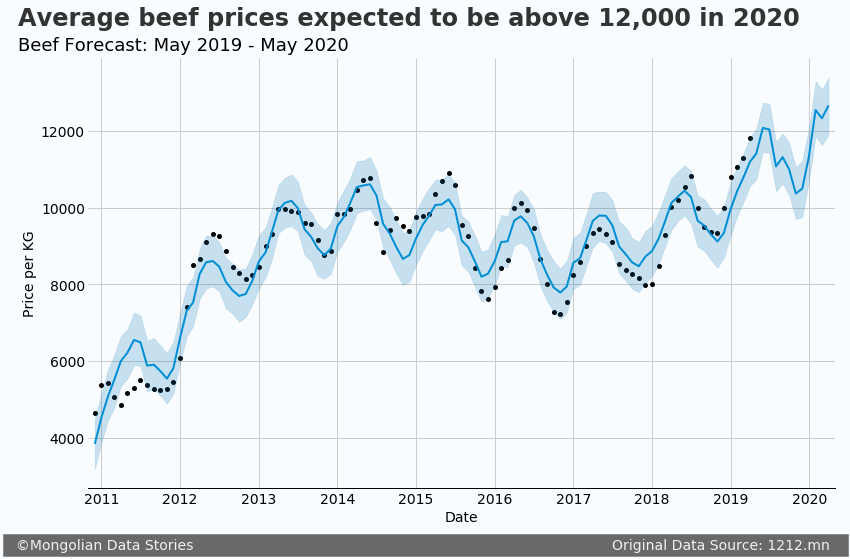

In [289]:
fig, ax = plt.subplots()
ax.plot(b_forecast['ds'], b_forecast['yhat'],linewidth=2)
ax.scatter(m.history['ds'].dt.to_pydatetime(), b.history['y'],c='black',marker='.',linewidths=2)
ax.fill_between(b_forecast['ds'], b_forecast['yhat_lower'], b_forecast['yhat_upper'], color='#0072B2', alpha=0.2)

ax.set_xlim(left='2010.11', right='2020.5')

ax.set_xlabel('Date')
ax.set_ylabel('Price per KG')
ax.text(x = 733750, y = 14750, s = 'Average beef prices expected to be above 12,000 in 2020', fontsize=24, weight='bold', alpha=.8)
ax.text(x = 733750, y = 14100, s= 'Beef Forecast: May 2019 - May 2020', fontsize=18)
ax.text(x = 733700, y = 1100, s = '  ©Mongolian Data Stories                                                                                             Original Data Source: 1212.mn   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('Images/beef-forecast.png', dpi = 300, bbox_inches="tight")

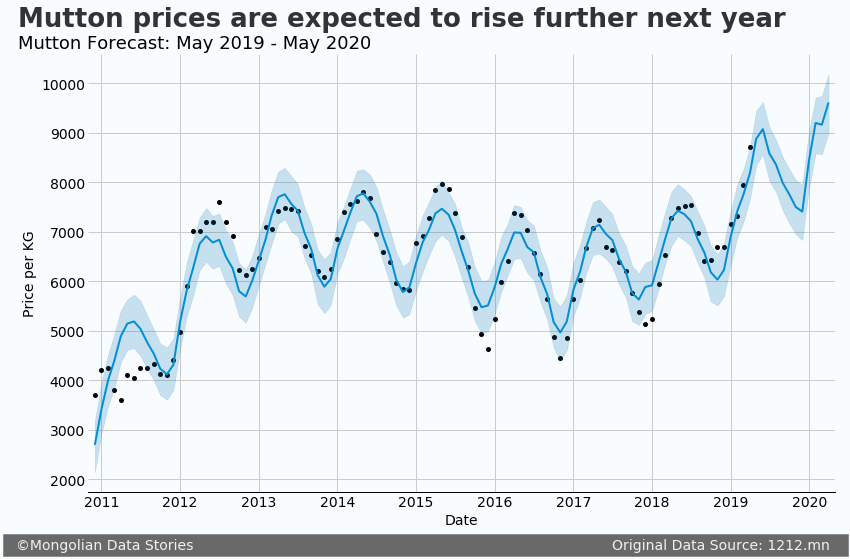

In [290]:
fig, ax = plt.subplots()
ax.plot(m_forecast['ds'], m_forecast['yhat'],linewidth=2)
ax.scatter(m.history['ds'].dt.to_pydatetime(), m.history['y'],c='black',marker='.',linewidths=2)
ax.fill_between(m_forecast['ds'], m_forecast['yhat_lower'], m_forecast['yhat_upper'], color='#0072B2', alpha=0.2)
ax.set_xlim(left='2010.11', right='2020.5')

ax.set_xlabel('Date')
ax.set_ylabel('Price per KG')
ax.text(x = 733750, y = 11150, s = 'Mutton prices are expected to rise further next year', fontsize=26, weight='bold', alpha=.8)
ax.text(x = 733750, y = 10700, s= 'Mutton Forecast: May 2019 - May 2020', fontsize=18)
ax.text(x = 733700, y = 600, s = '  ©Mongolian Data Stories                                                                                             Original Data Source: 1212.mn   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('Images/mutton-forecast.png', dpi = 300, bbox_inches="tight")